In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nbformat
from multidata import MultiData

In [101]:
%run ../Limpezas/limpeza_análise_energética.ipynb
%run ../Limpezas/limpeza_oferta_demanda.ipynb

In [102]:
analise_energetica = MultiData(dict_analise_energetica)
oferta_demanda = MultiData(dict_oferta_demanda)

In [97]:
data_unrenewable = (analise_energetica[0].columns.values)[:7]
data_renewable = (analise_energetica[0].columns.values)[7:]
projections_renewable = {}
projections_unrenewable = {}
for i in range(2015, 2021):
    for (projection_family, data_family) in ((projections_renewable, data_renewable), (projections_unrenewable, data_unrenewable)):
        projection_family[f'projeção {i}'] = projection_unrenewable = analise_energetica.Projection.VAR(i, columns = [(0, column_name) for column_name in data_family], title='teste2')
for i in range(2023, 2030):
    for (projection_family, data_family) in ((projections_renewable, data_renewable), (projections_unrenewable, data_unrenewable)):
        projection_family[f'projeção {i}'] = projection_unrenewable = analise_energetica.Projection.VAR(i, columns = [(0, column_name) for column_name in data_family], title='teste2')

projections_renewable = MultiData(projections_renewable)
projections_unrenewable = MultiData(projections_unrenewable)

# Panorama da Produção Sustentável de Energia no Brasil
Nos últimos anos, o debate sobre a produção de energia sustentável tem ganhado crescente relevância globalmente, impulsionado pela necessidade urgente de mitigar os impactos das mudanças climáticas e avançar em direção a um modelo energético mais limpo e sustentável. No contexto brasileiro, país rico em recursos naturais, a questão da produção de energia sustentável desponta como um elemento-chave para o desenvolvimento socioeconômico equilibrado e a preservação ambiental.

Esta análise tem como objetivo investigar e avaliar o panorama atual da produção de energia sustentável no Brasil, abordando tanto os avanços conquistados quanto os desafios a serem enfrentados, além de fazer projeções sobre o possível futuro desses dado o panorama atual.

## Avanços
O Brasil vem há muitos anos consolidadando a sua alta posição dentre os maiores produtores de energia renovável do mundo. [Hoje, o país é o terceiro maior produtor de energia renovável](https://www.portalsolar.com.br/noticias/mercado/internacional/brasil-e-terceiro-colocado-no-ranking-mundial-de-geracao-renovavel), ficando atrás apenas dos EUA e da China, o que se deve tanto aos componentes de maior peso da matriz energética brasileira - como a geração hidráulica e a dos produtos da cana - quanto do crescimento de fontes alternativas de energia renovável, como a solar e a gerada pelos produtos da cana.

Produção de Energia Renovável cresce

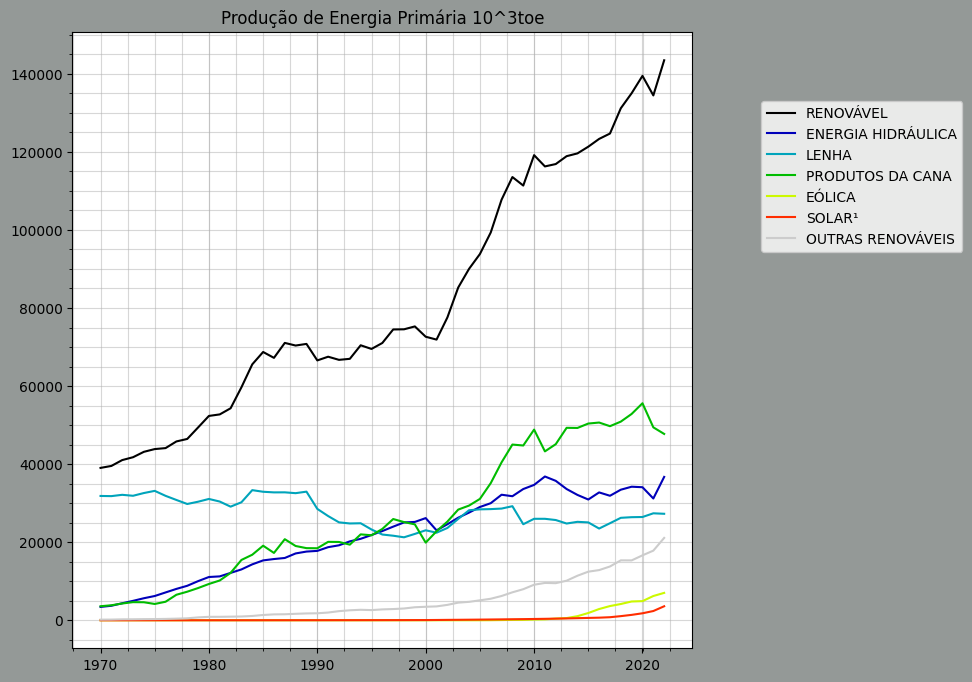

In [54]:
analise_energetica.Plotting.plot_selection(df=analise_energetica[0], pick=[name for name in analise_energetica[0].columns.values[7:]])

Apesar de a geração de energia renovável nunca ter verdadeiramente estagnado no país, está claro que ela desacelerou após o boom da produção de cana de açúcar dos anos 2000. Hoje vê-se que a inovação toma um papel cada vez mais importante, uma vez que um grande motor do crescimento da produção de energia sustentável são justamente as fontes alternativas de energia. Veja o gráfico abaixo em uma escala mais clara 

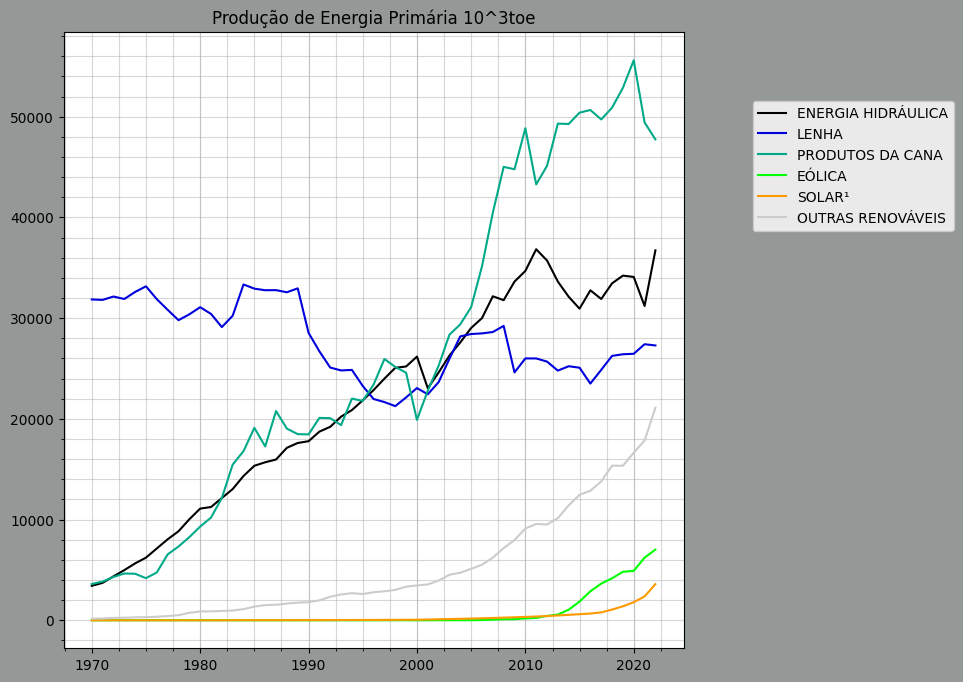

In [55]:
analise_energetica.Plotting.plot_selection(df=analise_energetica[0], pick=[name for name in analise_energetica[0].columns.values[8:]])

Apesar de as fontes alternativas ainda perderem para as mais consilidadas, como os produtos da cana, a energia hidráulica e a lenha, elas apresentam um crescimento vertiginoso e consistente nos últimos anos, podendo inclusive até ultrapassálas dentro de poucos anos. 

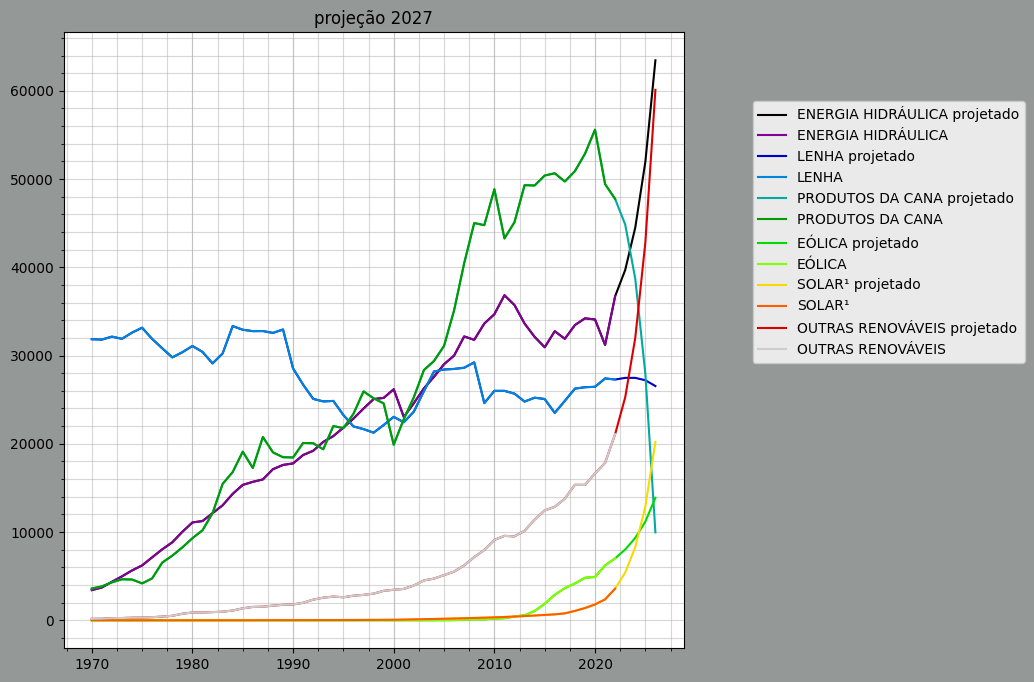

In [76]:
projeções_renovavel = projections_renewable["projeção 2027"].columns.values[2:]
projections_renewable.Plotting.plot_selection(df=projections_renewable["projeção 2027"], pick=projeções_renovavel)

In [ ]:
analise_energetica.Plotting.plot_selection(df=analise_energetica[0], pick=[name for name in analise_energetica[0].columns.values[8:]])

Dentre as fontes alternativas, a produção de energia solar fotovoltaica merece destaque em particular. Apesar de Brasil só ter começado a produzir em 2012, ele já ocupa a [Oitava colocação no ranking mundial de geração de energia solar](https://www.portalsolar.com.br/noticias/mercado/internacional/brasil-entra-pela-primeira-vez-no-top-10-mundial-de-geracao-de-energia-solar). Tendo um cresciemento de 700% entre 2019 e 2022 e sua geração voltada primariamente para o uso residencial.

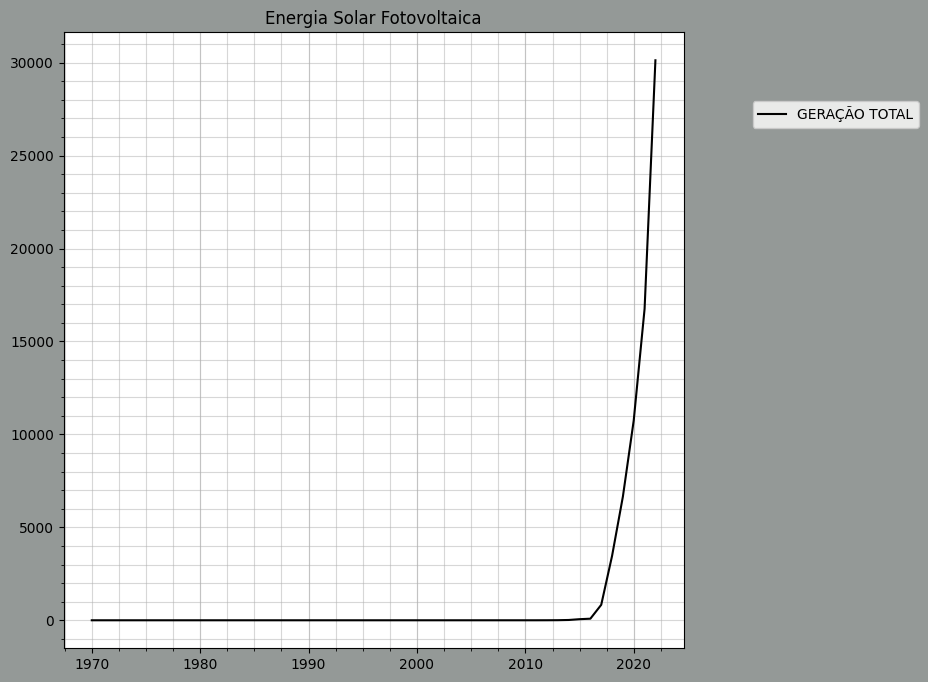

C:\Users\tomec\AppData\Local\Temp\ipykernel_9044\863700601.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  oferta_demanda["Energia_Solar_Térmica"].iloc[-1, 2:].plot.pie(autopct='%2f', title='Distribuição do consumo da energia fotovoltaica %')


<Axes: title={'center': 'Distribuição do consumo da energia fotovoltaica %'}, ylabel='2022-01-01 00:00:00'>

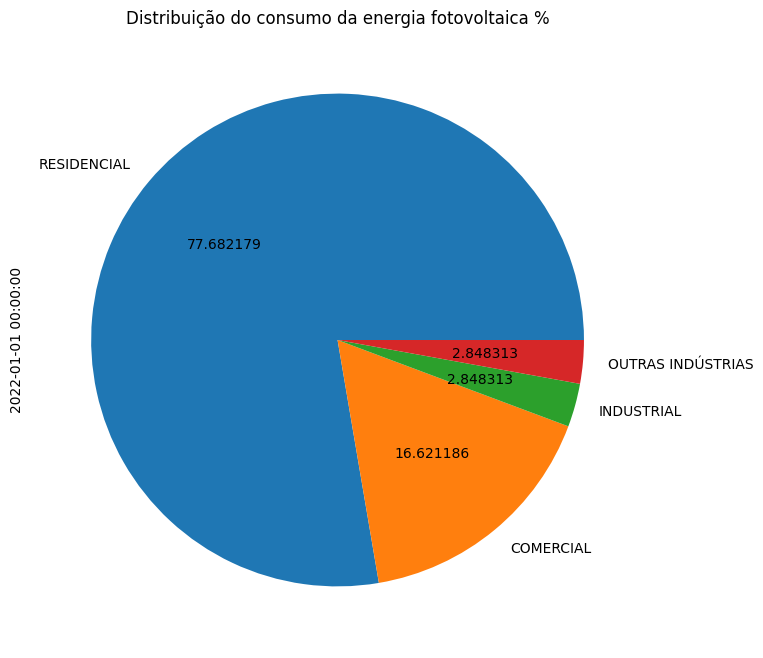

In [85]:
oferta_demanda.Plotting.autoplot(index="Energia_Solar_Fotovoltaica", n=1)
oferta_demanda["Energia_Solar_Térmica"].iloc[-1, 2:].plot.pie(autopct='%2f', title='Distribuição do consumo da energia fotovoltaica %')

## Desafios 
Apesar do crescimento em valores absulutos da produção de energia sustentável no Brasil, ela tem, proporcionalmente diminuido em relação à produção de energia de fontes insustentáveis consistentemente. 

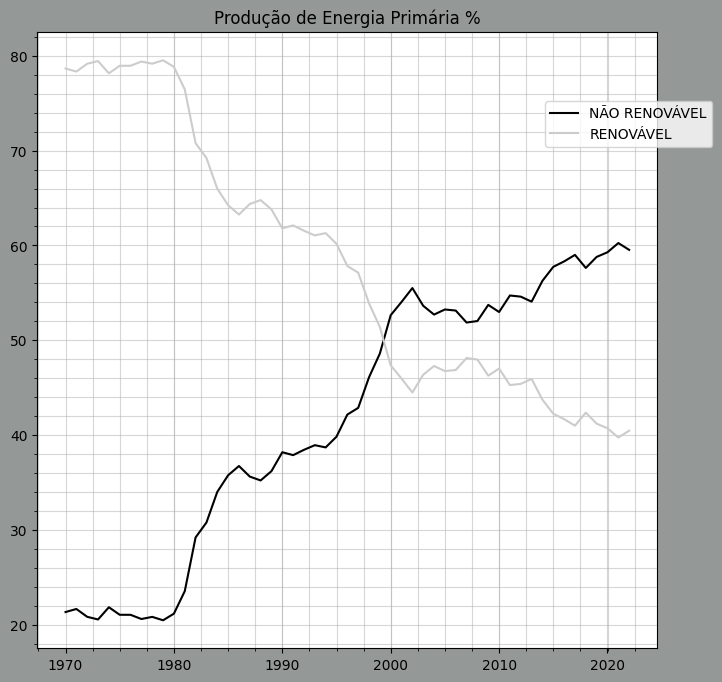

In [91]:
analise_energetica.Plotting.plot_selection(df=analise_energetica[1], pick=["RENOVÁVEL", "NÃO RENOVÁVEL"])

A situação é tal que a produção energia do petróleo, **sozinha**, ultrapassou todas as fontes renováveis combinadas

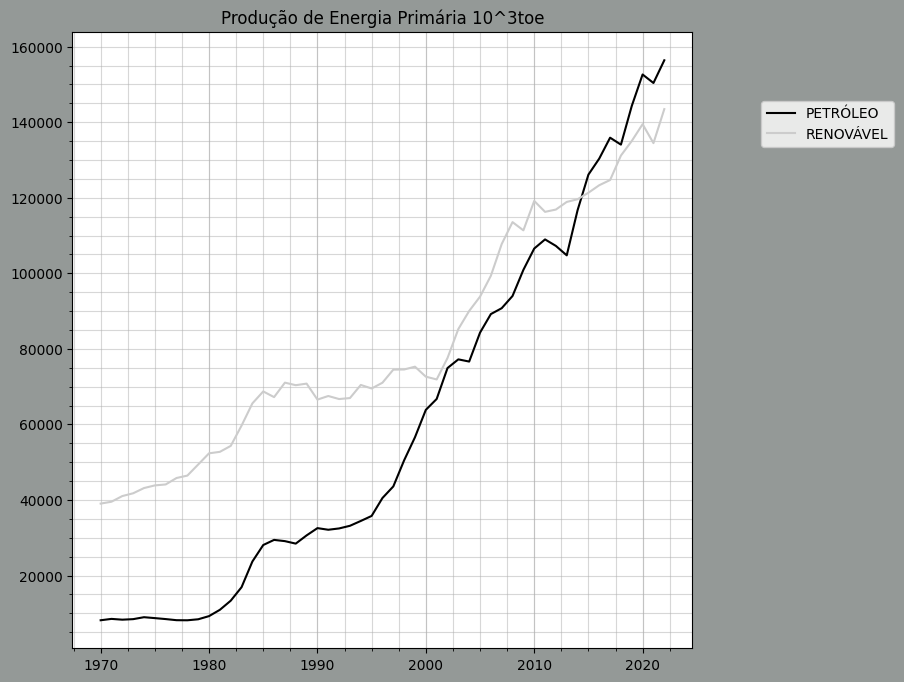

In [92]:
analise_energetica.Plotting.plot_selection(df=analise_energetica[0], pick=["RENOVÁVEL", "PETRÓLEO"])

Tal fato parece impressionante considerando o status do país como líder na produção sustentável de energia. Como pôde isso acontecer? Comparando os dados energéticos das fontes renováveis e das não renováveis, percebe-se um padrão interessante: 

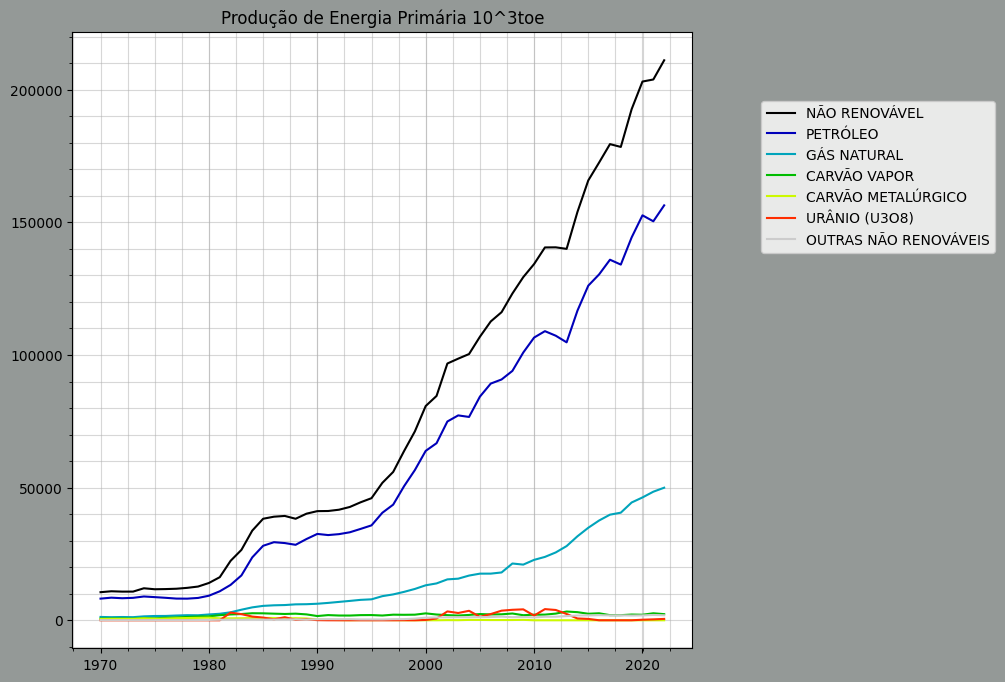

In [99]:
analise_energetica.Plotting.plot_selection(df=analise_energetica[0], pick = data_unrenewable)


Enquanto a energia advinda do petróleo e do gás natural crescem a um ritmo consistente, praticamente sempre crescendo

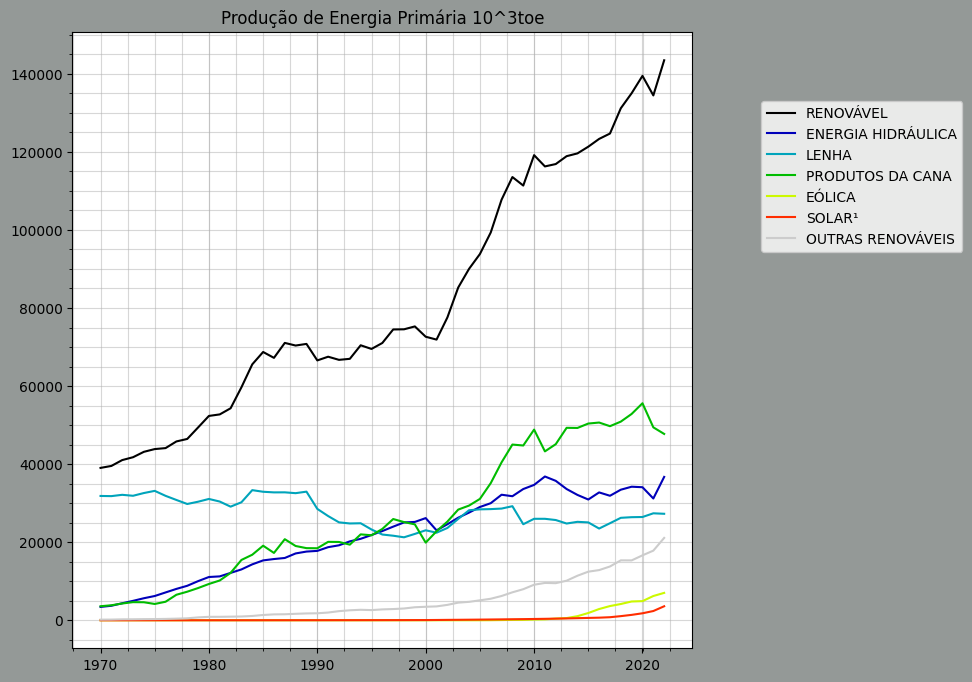

In [100]:
analise_energetica.Plotting.plot_selection(df=analise_energetica[0], pick = data_renewable)

As fontes de energia renovável crescem a solavancos seguidos de longos períodos de estagnação e queda. Tal conjuntura reflete a clara falta de investimento e interesse contínuos direcionados ao esforço da sustentabilização da matriz energética brasileira, ocorrendo, na verdade, o efeito inverso: o país se torna cada vez mais dependente de recursos finitos e insustentáveis à medida em que despreza os infinitamente renováveis.

# Considerações finais 
Apesar das críticas e do preocupante fenômeno da desustentabilização gradual que a matriz energética brasileira tem sofrido, é válido lembrar que, ainda assim, o país está muito à frente da média mundial nesse quesito. No Brasil, cerca de 40% da oferta interna de energia é renovável, enquanto a média mundial é de 14% e nos países da OCED(Organisation for Economic Co-operation and Development) é de 6% 

![alt_text](../assets/comparação_OIE.jpg) 

*([ECEN](http://ecen.com/eee33/brasilenerg2001.htm))*

Dessa forma, fundamenta-se a importância doinvestimento em inovação nas energias renováveis para garantir uma transição energética eficaz e sustentável no Brasil.